In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder,PolynomialFeatures,RobustScaler,PowerTransformer
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE

# •	Collect the time series data from the CSV file. 

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# •	Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, outliers etc. if any. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There's No Empty Cell(NULL Values) in the data = df

In [8]:
df.duplicated().sum()

1081

In [9]:
df = df.drop_duplicates()

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [47]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


In [12]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

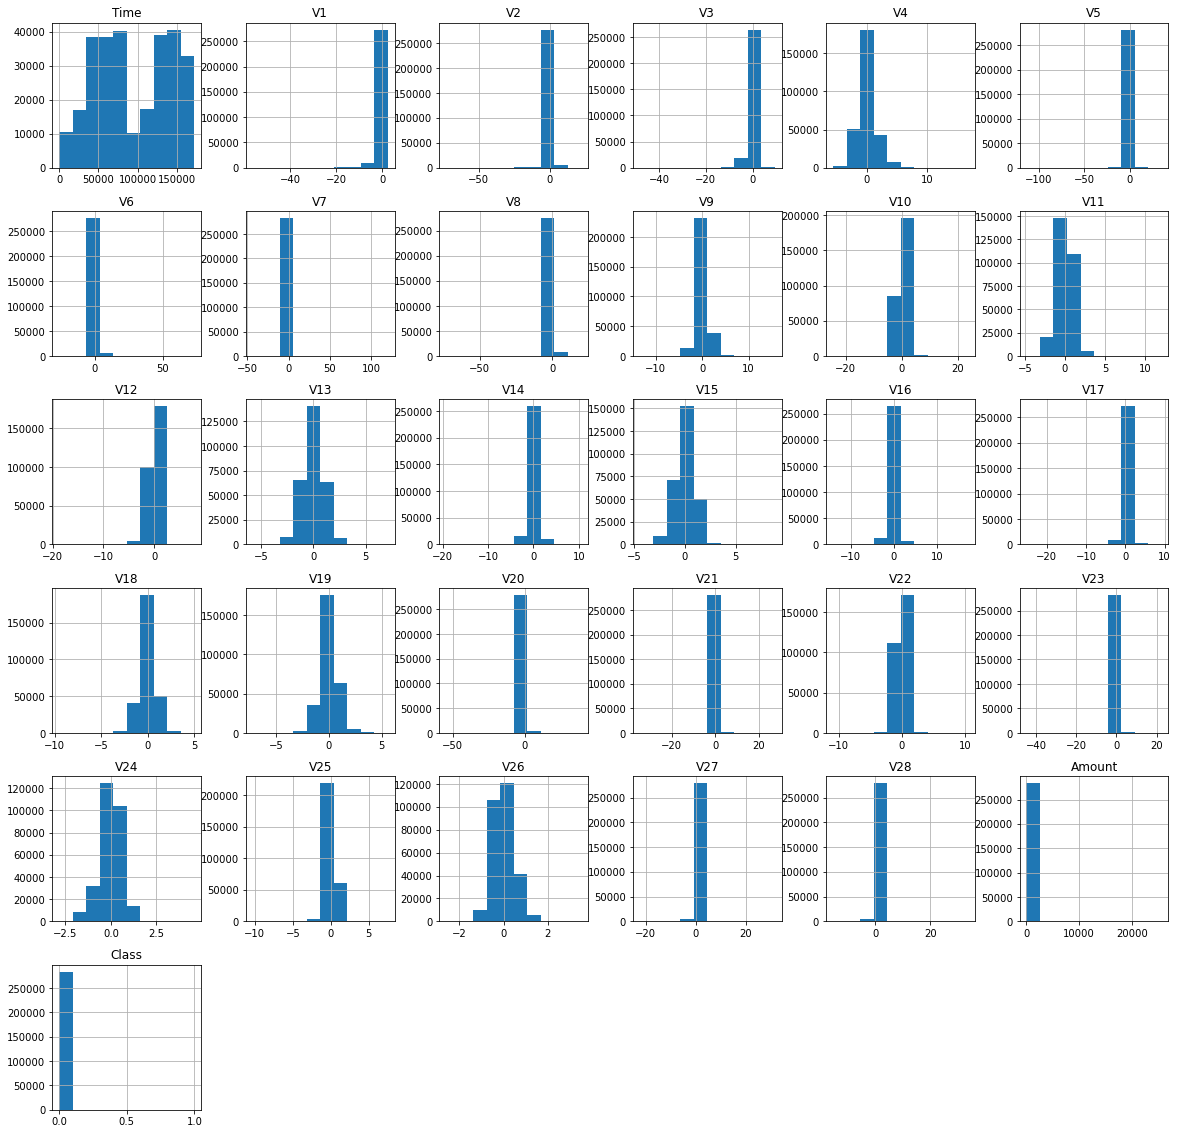

In [13]:
df.hist(figsize=(20,20))
plt.show()

In [14]:
# Count the occurrences of each class in the 'Class' column

class_counts = df['Class'].value_counts()
print(class_counts)

0    283253
1       473
Name: Class, dtype: int64


There are 2 classes available 0 stands for No Fraud, whereas 1 stands for Fraud


#Plotting in the bar graph

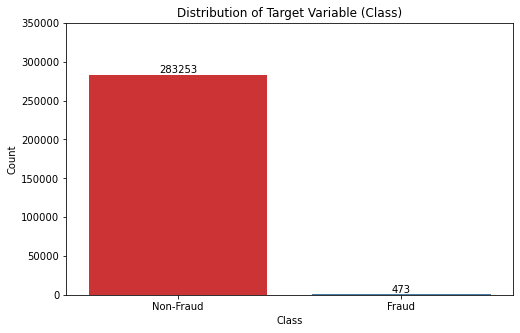

In [15]:
# Creating a bar chart
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Class', palette='Set1')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.ylim(0,350000)
plt.title('Distribution of Target Variable (Class)')

# Annotating the values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


### Plotting Scatter Plot for Amount wrt Time

In [46]:
df_fraud = df[df['Class']==1]
plt.figure(figsize=(8,5))
plt.scatter(df_fraud['Time'],df_fraud['Amount'])
plt.title('Scatter Plot Time Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.ylim(0,2600)
plt.show()

KeyError: 'Time'

<Figure size 576x360 with 0 Axes>



#Above 1000 there are only 9 frauds happened during different time interval.

#Mostly Frauds Are Of Small Amount

In [17]:
bigfrauds = df_fraud[df_fraud['Amount']>1000].shape[0]
mediumfrauds = df_fraud[df_fraud['Amount']<1000].shape[0]
smallfrauds = df_fraud[df_fraud['Amount']<100].shape[0]

print('When The Amount Was Greater Than 1000 Only, ' +  str(bigfrauds) + '  Frauds Were Found'  )
print('When The Amount Was less Than 1000 Only, ' +  str(mediumfrauds) + '  Frauds Were Found'  )
print('When The Amount Was less Than 100 Only, ' +  str(smallfrauds) + '  Frauds Were Found'  )

When The Amount Was Greater Than 1000 Only, 9  Frauds Were Found
When The Amount Was less Than 1000 Only, 464  Frauds Were Found
When The Amount Was less Than 100 Only, 348  Frauds Were Found


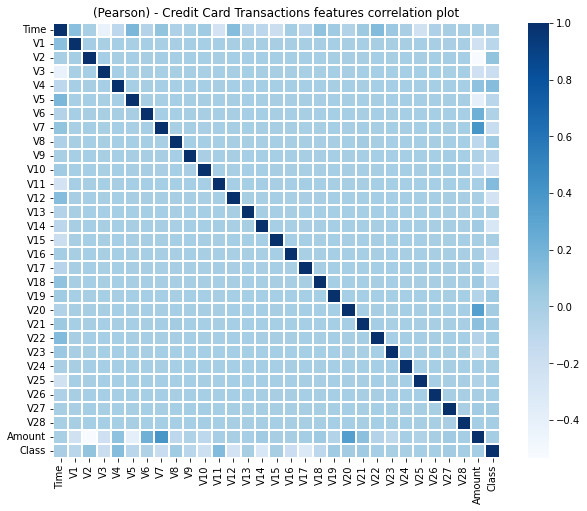

In [18]:
df_corr = df.corr()
plt.figure(figsize = (10,8))
plt.title('(Pearson) - Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.2,cmap="Blues")
plt.show()

Feature V1-V28 show no notable correlation, as expected.

There are some correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5

As we can notice, most of the features are not correlated with each other. This states that a PCA was previously performed on the data.

However, Principal Component Analysis (PCA) was previously performed on a dataset and the dimension reduction achieved through PCA is effective, then there should be no need to perform additional dimension reduction techniques on the same dataset. In other words, PCA is a dimensionality reduction technique itself, and if it was applied correctly, it should have already reduced the dataset's dimensionality to capture the most important information.

# •	Get the correct datatype for date.

In [19]:
# Assuming your time column is named 'Time' and contains timestamps in seconds
df['Time'] = pd.to_datetime(df['Time'], unit='s', origin='2013-09-01')

In [20]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2013-09-01 00:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2013-09-01 00:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2013-09-01 00:00:01,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2013-09-01 00:00:01,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2013-09-01 00:00:02,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.groupby('Class').mean().T

Class,0,1
V1,0.013439,-4.498280
V2,-0.009829,3.405965
V3,0.012853,-6.729599
V4,-0.010440,4.472591
V5,0.006769,-2.957197
V6,0.001251,-1.432518
V7,0.010447,-5.175912
V8,-0.002448,0.953255
V9,0.002613,-2.522124
V10,0.007663,-5.453274


In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df.Amount.values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df.Time.values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [23]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


In [24]:
print('The percentage of no frauds : ', round(df.Class.value_counts()[0]/len(df) * 100, 2), "%")
print('The percentage of frauds : ', round(df.Class.value_counts()[1]/len(df) * 100, 2), "%")

The percentage of no frauds :  99.83 %
The percentage of frauds :  0.17 %


In [25]:
X = df.drop('Class', axis=1)
y = df['Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [27]:
sm = SMOTE(random_state=2, sampling_strategy = 0.5)
X_over, y_over = sm.fit_resample(X_train, y_train)

In [28]:
y_over.shape

(318658,)

4) Basic Model Building

1) Logistic Regression
2) XGBoost
3) KNeighborsClassifier
4) Random Forest

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

1) Logistic Regression

In [30]:
logreg = LogisticRegression(max_iter = 1000)
rf_clf = RandomForestClassifier()
xgb_clf = xgb.XGBClassifier()
knn = KNeighborsClassifier()

In [31]:
logreg.fit(X_over, y_over)
y_pred = logreg.predict(X_test)
logc = metrics.classification_report(y_test, y_pred)
print(logc)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70814
           1       0.11      0.90      0.19       118

    accuracy                           0.99     70932
   macro avg       0.55      0.94      0.59     70932
weighted avg       1.00      0.99      0.99     70932



Text(0.5, 1.0, 'Precision Recall Curve')

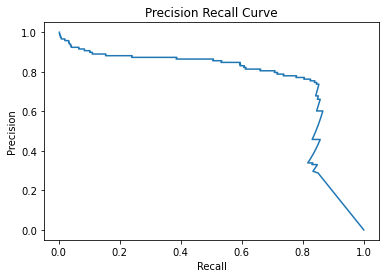

In [32]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

4.2) XGBoost Regression

In [33]:
xgb_clf.fit(X_over, y_over)
y_pred = xgb_clf.predict(X_test)
xgbc = metrics.classification_report(y_test, y_pred)
print(xgbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.77      0.83      0.80       118

    accuracy                           1.00     70932
   macro avg       0.89      0.92      0.90     70932
weighted avg       1.00      1.00      1.00     70932



Text(0.5, 1.0, 'Precision Recall Curve')

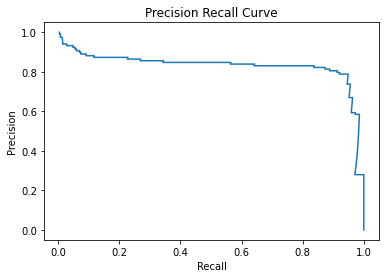

In [34]:
y_pred_prob = xgb_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

4.3) K-Nearest Neighbours classifcation

In [35]:
knn.fit(X_over, y_over)
y_pred = knn.predict(X_test)
knnc = metrics.classification_report(y_test, y_pred)
print(knnc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.39      0.86      0.54       118

    accuracy                           1.00     70932
   macro avg       0.70      0.93      0.77     70932
weighted avg       1.00      1.00      1.00     70932



Text(0.5, 1.0, 'Precision Recall Curve')

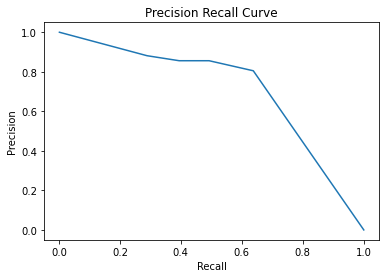

In [36]:
y_pred_prob = knn.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

4.4) Random Forest

In [37]:
rf_clf.fit(X_over, y_over)
y_pred = rf_clf.predict(X_test)
rfc = metrics.classification_report(y_test, y_pred)
print(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.88      0.82      0.85       118

    accuracy                           1.00     70932
   macro avg       0.94      0.91      0.93     70932
weighted avg       1.00      1.00      1.00     70932



Text(0.5, 1.0, 'Precision Recall Curve')

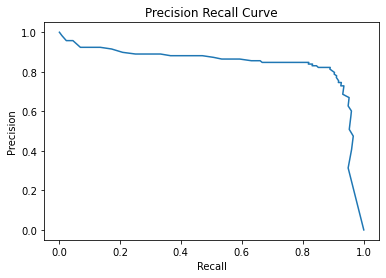

In [38]:
y_pred_prob = rf_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

Feature Importances:

In [39]:
importances = rf_clf.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
# Print feature importances with column names as index
for i, row in importances_df.iterrows():
    print("%s: %.3f" % (row['Feature'], row['Importance']))

V14: 0.234
V10: 0.135
V12: 0.104
V11: 0.091
V17: 0.088
V4: 0.044
V16: 0.043
V2: 0.032
V7: 0.031
V3: 0.027
V18: 0.015
V9: 0.015
scaled_amount: 0.013
V8: 0.011
V6: 0.011
V21: 0.010
V1: 0.010
V27: 0.009
V19: 0.008
V5: 0.008
V13: 0.008
V20: 0.008
V28: 0.007
V26: 0.007
V15: 0.006
V23: 0.005
V25: 0.005
scaled_time: 0.005
V22: 0.005
V24: 0.004


5) Model Tuning

In [40]:
#Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 250, 500],
    'multi_class': ['ovr', 'multinomial']}

grid_lg = GridSearchCV(logreg, logreg_param_grid, cv = 5, verbose=1, n_jobs = -1)
best_fit_lg = grid_lg.fit(X_over, y_over)
y_pred = best_fit_lg.best_estimator_.predict(X_test)
grid_lg = metrics.classification_report(y_test, y_pred)
print(grid_lg)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70814
           1       0.11      0.90      0.19       118

    accuracy                           0.99     70932
   macro avg       0.55      0.94      0.59     70932
weighted avg       1.00      0.99      0.99     70932



In [41]:
# Random Forest Classifier
rf_param_grid = {"criterion": ["gini", "entropy"], 
                 "max_depth": list(range(2,4,1)), 
                 "min_samples_leaf": list(range(5,7,1))}

grid_rf = GridSearchCV(rf_clf, rf_param_grid, cv = 5, verbose=1, n_jobs = -1)
best_fit_rf = grid_rf.fit(X_over, y_over)
y_pred = best_fit_rf.best_estimator_.predict(X_test)
grid_rf = metrics.classification_report(y_test, y_pred)
print(grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.62      0.87      0.73       118

    accuracy                           1.00     70932
   macro avg       0.81      0.94      0.86     70932
weighted avg       1.00      1.00      1.00     70932



In [42]:
# XGBoost Classifier
xgb_param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [5, 10],
    'learning_rate': [0.1, 1.0],
    'subsample': [0.5, 0.75, 1.0]}

grid_xgb = GridSearchCV(xgb_clf, xgb_param_grid, cv = 2, verbose=1, n_jobs = -1)
best_fit_xgb = grid_xgb.fit(X_over, y_over)
y_pred = best_fit_xgb.best_estimator_.predict(X_test)
grid_xgb = metrics.classification_report(y_test, y_pred)
print(grid_xgb)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.85      0.83      0.84       118

    accuracy                           1.00     70932
   macro avg       0.93      0.92      0.92     70932
weighted avg       1.00      1.00      1.00     70932



In [43]:
#KNN classification
knn_param_grid = {'n_neighbors': [3, 5],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

grid_knn = GridSearchCV(knn, knn_param_grid, cv = 2, verbose=1, n_jobs = -1)
best_fit_knn = grid_knn.fit(X_over, y_over)
y_pred = best_fit_knn.best_estimator_.predict(X_test)
grid_knn = metrics.classification_report(y_test, y_pred)
print(grid_knn)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.52      0.85      0.64       118

    accuracy                           1.00     70932
   macro avg       0.76      0.92      0.82     70932
weighted avg       1.00      1.00      1.00     70932



6) Ensemble Model Building

In [44]:
vot_soft = VotingClassifier(estimators = [("Random Forest Classifier", best_fit_rf.best_estimator_), 
                                          ("XGBoost Classifier", best_fit_xgb.best_estimator_)], 
                            voting ='soft')

vot_soft.fit(X_over, y_over)
y_pred = vot_soft.predict(X_test)
  
score = metrics.classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.82      0.84      0.83       118

    accuracy                           1.00     70932
   macro avg       0.91      0.92      0.92     70932
weighted avg       1.00      1.00      1.00     70932



In [55]:
print(logc, xgbc,rfc, knnc)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70814
           1       0.11      0.90      0.19       118

    accuracy                           0.99     70932
   macro avg       0.55      0.94      0.59     70932
weighted avg       1.00      0.99      0.99     70932
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.77      0.83      0.80       118

    accuracy                           1.00     70932
   macro avg       0.89      0.92      0.90     70932
weighted avg       1.00      1.00      1.00     70932
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.88      0.82      0.85       118

    accuracy                           1.00     70932
   macro avg       0.94      0.91      0.93     70932
weighted avg       1.00      1.00      1.00     70932
               preci

7) Conclusion

With this Project, I discovered that unbalanced data is addressed very differently and that various metrics are required for each categorization challenge.